In [1]:
#Question 1:
print("(A, d)")
print("(B, c)")
print("(C, b)")
print("(D, a)")




(A, d)
(B, c)
(C, b)
(D, a)


In [2]:
#Question 2:
print("(A, b)")
print("(B, e)")
print("(C, c)")
print("(D, a)")
print("(E, d)")

(A, b)
(B, e)
(C, c)
(D, a)
(E, d)


In [2]:
#Question 3:

import time
import pandas as pd
from datetime import datetime
import requests
from bs4 import BeautifulSoup
import random

#Initialize lists to store movie data:
titles = []
crit_ratings = []
user_ratings = []
months = []
days = []
years = []

#Must loop through the pages since we only get about 32 on the first
page = 1
movies_collected = 0

while movies_collected < 300:
    
    #Get soup from the url with page
    url = f"https://www.rottentomatoes.com/browse/movies_at_home/sort:popular?page={page}"
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    
    #Get all movies
    movies = soup.find_all('div', {'data-qa': 'discovery-media-list-item'})
    if not movies:
        break
    
    #Extract data from each movie, skip everything that is missing data
    for movie in movies:
        if movies_collected >= 300:
            break
            
        #Get title
        title_tag = movie.find('span', {'data-qa': 'discovery-media-list-item-title'})
        if not title_tag:
            continue
        title = title_tag.text.strip()
        
        #Get crit_rating
        crit_tag = movie.find('rt-text', {'slot': 'criticsScore'})
        if not crit_tag or not crit_tag.text.strip() or crit_tag.text.strip() == '--':
            continue
        #Skip if exception
        try:
            crit_rating = int(crit_tag.text.strip().replace('%', ''))
        except:
            continue
        
        #Get user_rating
        user_tag = movie.find('rt-text', {'slot': 'audienceScore'})
        if not user_tag or not user_tag.text.strip() or user_tag.text.strip() == '--':
            continue
        #Skip if exception
        try:
            user_rating = int(user_tag.text.strip().replace('%', ''))
        except:
            continue
        
        #Get date
        date_tag = movie.find('span', {'data-qa': 'discovery-media-list-item-start-date'})
        if not date_tag or not date_tag.text.strip():
            continue
        date_text = date_tag.text.strip()
        
        #Parse date to get mdy, skip if exception
        try:
            #Remove prefix
            date_text = date_text.replace('Streaming ', '')
            
            date_obj = datetime.strptime(date_text, '%b %d, %Y')
            month = date_obj.month
            day = date_obj.day
            year = date_obj.year
        except:
            continue
        
        #All data is good, append
        titles.append(title)
        crit_ratings.append(crit_rating)
        user_ratings.append(user_rating)
        months.append(month)
        days.append(day)
        years.append(year)
        
        #Increment
        movies_collected += 1

    
    #Print to check progress
    print(page)
    print(movies_collected)
    
    #Go to next page
    page += 1
    
    #Random delay to not overwhelm server
    delay = random.uniform(2, 4)
    time.sleep(delay)

#Create df from data
movies_lowdim = pd.DataFrame({
    'title': titles,
    'critic_rating': crit_ratings,
    'user_rating': user_ratings,
    'month': months,
    'day': days,
    'year': years
})

#Show first 10
movies_lowdim.head(10)


1
24
2
70
3
140
4
233


,title,critic_rating,user_rating,month,day,year
0,The Woman in Cabin 10,28,31,10,10,2025
1,Weapons,93,85,9,9,2025
2,The Lost Bus,87,94,10,3,2025
3,The Substance,89,76,10,31,2024
4,Bring Her Back,89,79,7,1,2025
5,Good Boy,89,82,10,24,2025
6,A HOUSE OF DYNAMITE,81,76,10,24,2025
7,I Know What You Did Last Summer,36,68,8,26,2025
8,The Conjuring: Last Rites,59,78,10,7,2025
9,HIM,31,57,10,7,2025


In [3]:
#Save as excel file
#movies_lowdim.to_excel('movies_lowdim.xlsx', index=False)

User rating mean: 74.71, User rating stdev: 18.19, User rating 25th percentile: 64.75, User rating 75th percentile: 89.00
Critic rating mean: 75.31, Critic rating stdev: 21.53, Critic rating 25th percentile: 65.00, Critic rating 75th percentile: 92.00


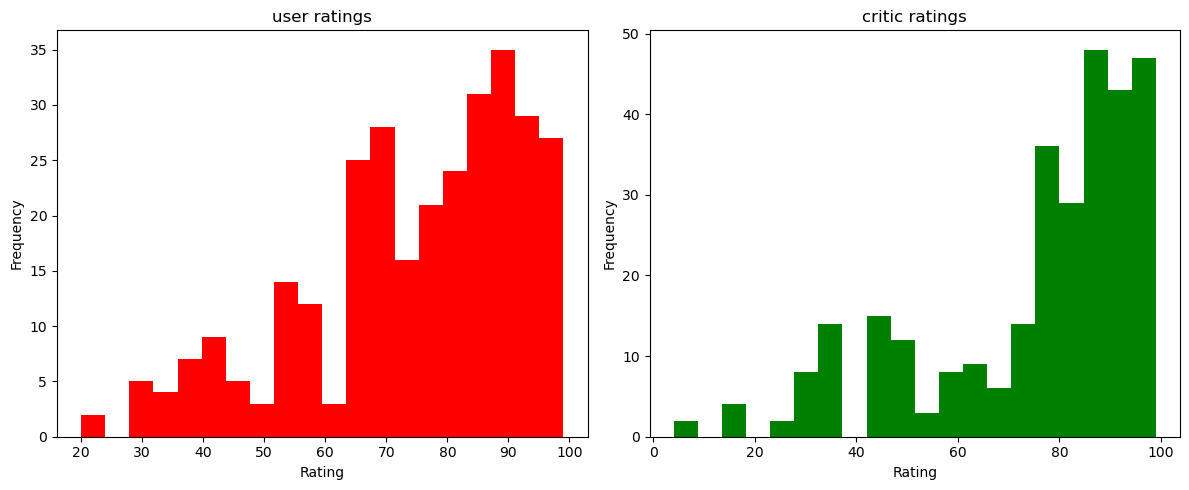

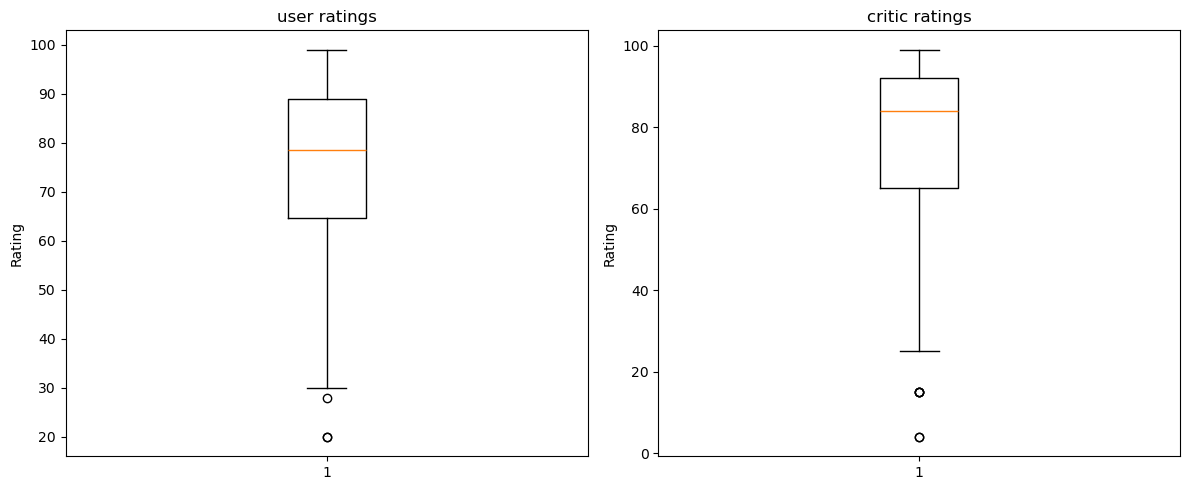

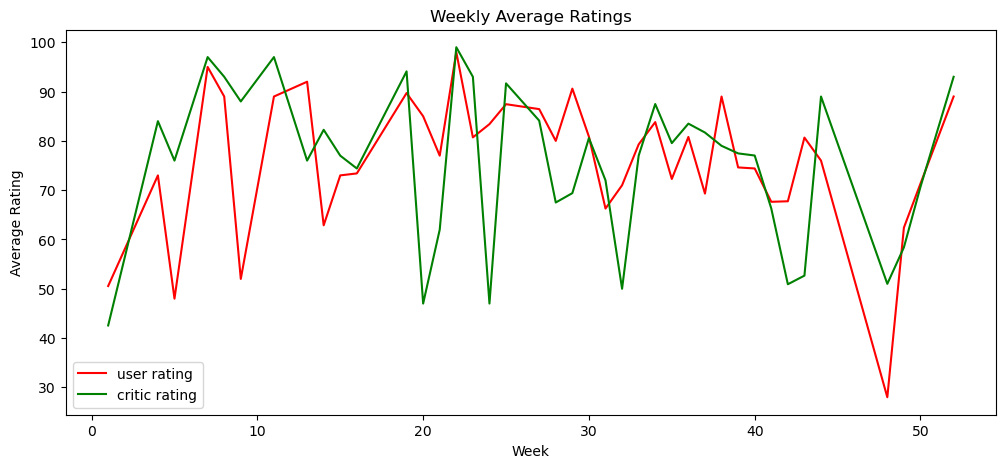

               user_rating  critic_rating
user_rating       1.000000       0.462273
critic_rating     0.462273       1.000000


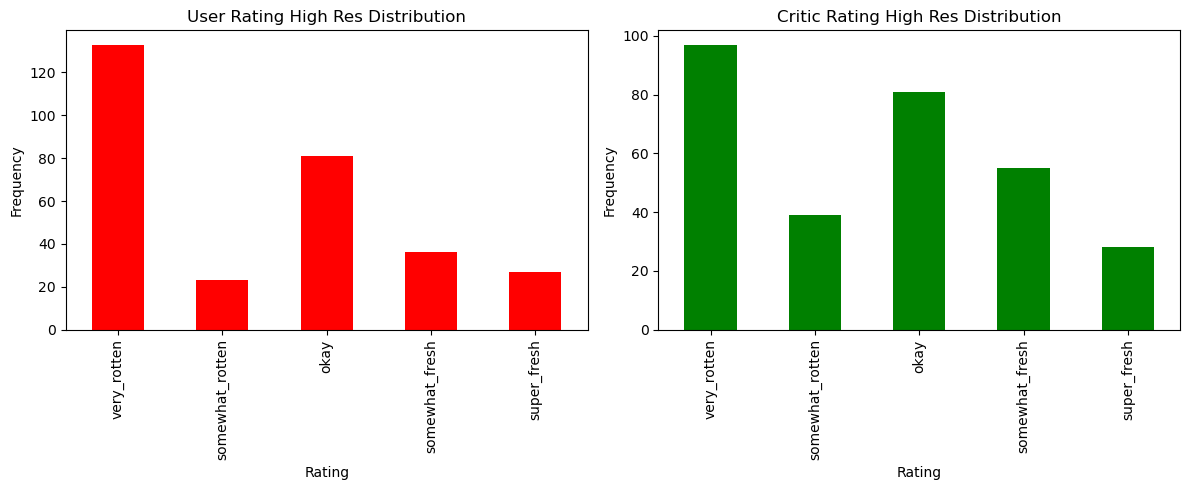

User rating highest frequency bucket: very_rotten
Critic rating highest frequency bucket: very_rotten


In [4]:
#Question 4:

import matplotlib.pyplot as plt

movies_lowdim = pd.read_excel('movies_lowdim.xlsx')


#Print stats
print(f"User rating mean: {movies_lowdim['user_rating'].mean():.2f}, User rating stdev: {movies_lowdim['user_rating'].std():.2f}, User rating 25th percentile: {movies_lowdim['user_rating'].quantile(0.25):.2f}, User rating 75th percentile: {movies_lowdim['user_rating'].quantile(0.75):.2f}")
print(f"Critic rating mean: {movies_lowdim['critic_rating'].mean():.2f}, Critic rating stdev: {movies_lowdim['critic_rating'].std():.2f}, Critic rating 25th percentile: {movies_lowdim['critic_rating'].quantile(0.25):.2f}, Critic rating 75th percentile: {movies_lowdim['critic_rating'].quantile(0.75):.2f}")

#Plot hists
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].hist(movies_lowdim['user_rating'], bins=20, color='red')
ax[0].set_title('user ratings')
ax[0].set_xlabel('Rating')
ax[0].set_ylabel('Frequency')
ax[1].hist(movies_lowdim['critic_rating'], bins=20, color='green')
ax[1].set_title('critic ratings')
ax[1].set_xlabel('Rating')
ax[1].set_ylabel('Frequency')
plt.tight_layout()
plt.show()

#Plot boxplots
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].boxplot(movies_lowdim['user_rating'])
ax[0].set_title('user ratings')
ax[0].set_ylabel('Rating')
ax[1].boxplot(movies_lowdim['critic_rating'])
ax[1].set_title('critic ratings')
ax[1].set_ylabel('Rating')
plt.tight_layout()
plt.show()

#Add datetime to df and extract week number
movies_lowdim['date'] = pd.to_datetime({
    'year': movies_lowdim['year'],
    'month': movies_lowdim['month'],
    'day': movies_lowdim['day']
})
movies_lowdim['week'] = movies_lowdim['date'].dt.isocalendar().week
movies_lowdim['week'] = movies_lowdim['week'].astype(int)

#Plot weekly timeline
weekly_avg = movies_lowdim.groupby('week')[['user_rating', 'critic_rating']].mean()
plt.figure(figsize=(12, 5))
plt.plot(weekly_avg['user_rating'], label='user rating', color='red')
plt.plot(weekly_avg['critic_rating'], label='critic rating', color='green')
plt.title('Weekly Average Ratings')
plt.xlabel('Week')
plt.ylabel('Average Rating')
plt.legend()
plt.show()

#Print user and critic correlation
print(weekly_avg.corr())

#Make buckets using cut and plot bar charts
movies_lowdim['user_bucket'] = pd.cut(movies_lowdim['user_rating'], bins=[0, 75, 80, 90, 95, 100], labels=['very_rotten', 'somewhat_rotten', 'okay', 'somewhat_fresh', 'super_fresh'])
movies_lowdim['critic_bucket'] = pd.cut(movies_lowdim['critic_rating'], bins=[0, 75, 80, 90, 95, 100], labels=['very_rotten', 'somewhat_rotten', 'okay', 'somewhat_fresh', 'super_fresh'])

fig, ax = plt.subplots(1, 2, figsize=(12, 5))
movies_lowdim['user_bucket'].value_counts().sort_index().plot(kind='bar', ax=ax[0], color='red')
ax[0].set_title('User Rating High Res Distribution')
ax[0].set_xlabel('Rating')
ax[0].set_ylabel('Frequency')
movies_lowdim['critic_bucket'].value_counts().sort_index().plot(kind='bar', ax=ax[1], color='green')
ax[1].set_title('Critic Rating High Res Distribution')
ax[1].set_xlabel('Rating')
ax[1].set_ylabel('Frequency')
plt.tight_layout()
plt.show()

#Print highest frequency buckets
print("User rating highest frequency bucket:", movies_lowdim['user_bucket'].value_counts().idxmax())
print("Critic rating highest frequency bucket:", movies_lowdim['critic_bucket'].value_counts().idxmax())

#Make low res buckets using cut
movies_lowdim['user_bucket_number'] = pd.cut(movies_lowdim['user_rating'], bins=[0, 80, 90, 100], labels=['1', '2', '3'])
movies_lowdim['critic_bucket_number'] = pd.cut(movies_lowdim['critic_rating'], bins=[0, 80, 90, 100], labels=['1', '2', '3'])


In [5]:
#Question 5:

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

#Convert categorical bucket numbers to integers
movies_lowdim['user_bucket_number'] = movies_lowdim['user_bucket_number'].astype(str).astype(int)
movies_lowdim['critic_bucket_number'] = movies_lowdim['critic_bucket_number'].astype(str).astype(int)

y = movies_lowdim['user_bucket_number']

#Function to calculate accuracies since we need to do it 8 times
def evaluate_model(model, X, y, cv=5):
    
    #Training accuracy
    model.fit(X, y)
    train_acc = model.score(X, y)
    
    #Test accuracy with cv = 5
    test_scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
    test_acc = test_scores.mean()
    
    return train_acc, test_acc

results = []

print("Algorithm: DecisionTreeClassifier")

#Only use critic bucket numbers
X1 = movies_lowdim[['critic_bucket_number']]
dtc1 = DecisionTreeClassifier(random_state=1)
train_acc1, test_acc1 = evaluate_model(dtc1, X1, y)
print(f"Scenario 1: {train_acc1:.4f} {test_acc1:.4f}")
results.append(('DecisionTreeClassifier', 'Scenario 1', train_acc1, test_acc1))

#Use critic percent
X2 = movies_lowdim[['critic_rating']]
dtc2 = DecisionTreeClassifier(random_state=1)
train_acc2, test_acc2 = evaluate_model(dtc2, X2, y)
print(f"Scenario 2: {train_acc2:.4f} {test_acc2:.4f}")
results.append(('DecisionTreeClassifier', 'Scenario 2', train_acc2, test_acc2))

#Use month and critic bucket numbers
X3 = movies_lowdim[['month', 'critic_bucket_number']]
dtc3 = DecisionTreeClassifier(random_state=1)
train_acc3, test_acc3 = evaluate_model(dtc3, X3, y)
print(f"Scenario 3: {train_acc3:.4f} {test_acc3:.4f}")
results.append(('DecisionTreeClassifier', 'Scenario 3', train_acc3, test_acc3))

#Use date and critic percent
X4 = movies_lowdim[['month', 'year', 'day', 'critic_rating']]
dtc4 = DecisionTreeClassifier(random_state=1)
train_acc4, test_acc4 = evaluate_model(dtc4, X4, y)
print(f"Scenario 4: {train_acc4:.4f} {test_acc4:.4f}")
results.append(('DecisionTreeClassifier', 'Scenario 4', train_acc4, test_acc4))

print("Algorithm: RandomForestClassifier")

rfc1 = RandomForestClassifier(n_estimators=10, random_state=1)
train_acc5, test_acc5 = evaluate_model(rfc1, X1, y)
print(f"Scenario 1: {train_acc5:.4f} {test_acc5:.4f}")
results.append(('RandomForestClassifier', 'Scenario 1', train_acc5, test_acc5))


rfc2 = RandomForestClassifier(n_estimators=10, random_state=1)
train_acc6, test_acc6 = evaluate_model(rfc2, X2, y)
print(f"Scenario 2: {train_acc6:.4f} {test_acc6:.4f}")
results.append(('RandomForestClassifier', 'Scenario 2', train_acc6, test_acc6))

rfc3 = RandomForestClassifier(n_estimators=10, random_state=1)
train_acc7, test_acc7 = evaluate_model(rfc3, X3, y)
print(f"Scenario 3: {train_acc7:.4f} {test_acc7:.4f}")
results.append(('RandomForestClassifier', 'Scenario 3', train_acc7, test_acc7))

rfc4 = RandomForestClassifier(n_estimators=10, random_state=1)
train_acc8, test_acc8 = evaluate_model(rfc4, X4, y)
print(f"Scenario 4: {train_acc8:.4f} {test_acc8:.4f}")
results.append(('RandomForestClassifier', 'Scenario 4', train_acc8, test_acc8))

#Find best result by test acc 
best_result = max(results, key=lambda x: x[3])
print(f"Best Test Performance: {best_result[0]}, {best_result[1]}")

Algorithm: DecisionTreeClassifier
Scenario 1: 0.5433 0.5433
Scenario 2: 0.7767 0.7533
Scenario 3: 0.6833 0.6333
Scenario 4: 1.0000 0.9733
Algorithm: RandomForestClassifier
Scenario 1: 0.5433 0.5433
Scenario 2: 0.7767 0.7467
Scenario 3: 0.6800 0.6167
Scenario 4: 1.0000 0.9700
Best Test Performance: DecisionTreeClassifier, Scenario 4


In [6]:
#Question 6:

print("(A, b)")
print("(B, a)")
print("(C, c)")

(A, b)
(B, a)
(C, c)


In [7]:
#Question 7:

#Pick 15 random movies
sample_movies = movies_lowdim.sample(n=15, random_state=1)

#Print info
for idx, row in sample_movies.iterrows():
    print(f"Name: {row['title']}, User Bucket: {row['user_bucket']}, Critic Bucket: {row['critic_bucket']}")
   

Name: Fifty Shades of Grey, User Bucket: very_rotten, Critic Bucket: very_rotten
Name: Talk to Me, User Bucket: okay, Critic Bucket: somewhat_fresh
Name: The Bad Guys 2, User Bucket: somewhat_fresh, Critic Bucket: okay
Name: The Fantastic Four: First Steps, User Bucket: somewhat_fresh, Critic Bucket: okay
Name: John Candy: I Like Me, User Bucket: super_fresh, Critic Bucket: okay
Name: The Thursday Murder Club, User Bucket: very_rotten, Critic Bucket: somewhat_rotten
Name: The Ballad of Wallis Island, User Bucket: somewhat_fresh, Critic Bucket: super_fresh
Name: Warfare, User Bucket: somewhat_fresh, Critic Bucket: somewhat_fresh
Name: The Phoenician Scheme, User Bucket: very_rotten, Critic Bucket: somewhat_rotten
Name: Thunderbolts*, User Bucket: somewhat_fresh, Critic Bucket: okay
Name: I Know What You Did Last Summer, User Bucket: very_rotten, Critic Bucket: very_rotten
Name: The Monkey, User Bucket: very_rotten, Critic Bucket: somewhat_rotten
Name: 28 Days Later, User Bucket: okay, C

In [8]:
all_movies_data = []

#Scrape data for each movie
for idx, row in sample_movies.iterrows():
    
    #Convert titles into format we can plug into the url
    movie_title = row['title']
    url_title = movie_title.lower()
    url_title = url_title.replace(' ', '_')
    url_title = url_title.replace(':', '')
    url_title = url_title.replace("*", '')
    
    
    print(f"\nProcessing: {movie_title}")
    
    movie_raw = {
        'movie_title': movie_title.lower(),
        'designation': 'not_available',
        'genres': [],
        'director_name': 'not_available',
        'in_theatres': 'not_available',
        'streaming': 'not_available',
        'reviews': []
    }
    
    #Get reviews page and turn into soup
    reviews_url = f"https://www.rottentomatoes.com/m/{url_title}/reviews"
    response = requests.get(reviews_url, timeout=10)
    soup = BeautifulSoup(response.text, 'html.parser')
    
    #We will get all of our data here from the sidebar that has everything in li
    sidebar = soup.find('ul', {'data-qa': 'sidebar-movie-details'})
    
    if sidebar:
        #Get all list items
        list_items = sidebar.find_all('li')
        
        #The structure is always designation, genres, director, in_theaters, streaming
        #Sometimes no theater release so streaming is in position 3 instead
        

        designation_text = list_items[0].get_text().strip().lower()
        #Split on comma and take the first part to get just the designation not duration
        movie_raw['designation'] = designation_text.split(',')[0].strip()
    

        genres_text = list_items[1].get_text().strip()
        movie_raw['genres'] = [g.strip().lower() for g in genres_text.split(',')]
    

        director_link = list_items[2].find('a', href=lambda x: x and '/celebrity/' in x)
        if director_link:
            movie_raw['director_name'] = director_link.get_text().strip().lower()
    
        #Check if this is theater or streaming date
        date_text = list_items[3].get_text().strip()
        
        if 'Theaters' in date_text:
    
            try:
                date_text = date_text.replace('In Theaters:', '').strip()
                movie_raw['in_theatres'] = datetime.strptime(date_text, '%b %d, %Y')
                
                date_text = list_items[4].get_text().strip()
            
                #Remove prefix
                date_text = date_text.replace('Streaming:', '').strip()
                movie_raw['streaming'] = datetime.strptime(date_text, '%b %d, %Y')
            except:
                pass
        else:
            #No theater release: this position has streaming date instead
            try:
                date_text = date_text.replace('Streaming:', '').replace('On Disc/Streaming:', '').strip()
                movie_raw['streaming'] = datetime.strptime(date_text, '%b %d, %Y')
            except:
                pass
    
            
            
            
    #Get first 5 reviews
    review_rows = soup.find_all('div', {'class': 'review-row'})[:5]
    
    #Get review data for each review
    for review_row in review_rows:
        review_dict = {
            'review_author': 'not_available',
            'review_publication': 'not_available',
            'review_text': 'not_available',
            'review_fresh': 0,
            'review_score': 'not_available'
        }
        
        name_pub_div = review_row.find('div', {'class': 'reviewer-name-and-publication'})
        if name_pub_div:
            #Get author
            author_link = name_pub_div.find('a', {'class': 'display-name'})
            if author_link:
                review_dict['review_author'] = author_link.get_text().strip().lower()
            
            #Get publication
            pub_link = name_pub_div.find('a', {'class': 'publication'})
            if pub_link:
                review_dict['review_publication'] = pub_link.get_text().strip().lower()
        
        #Get freshness from score icon, translate positive and negative to 1, 0 freshness
        score_icon = review_row.find('score-icon-critics')
        if score_icon:
            sentiment = score_icon.get('sentiment', '').upper()
            if sentiment == 'POSITIVE':
                review_dict['review_fresh'] = 1
            elif sentiment == 'NEGATIVE':
                review_dict['review_fresh'] = 0
        
        #Get review text
        text_container = review_row.find('div', {'class': 'review-text-container'})
        if text_container:
            text_p = text_container.find('p', {'class': 'review-text'})
            if text_p:
                review_dict['review_text'] = text_p.get_text().strip().lower()
            
            #Carefully parse to get original score (often not even one)
            score_p = text_container.find('p', {'class': 'original-score-and-url'})
            if score_p:
                score_text = score_p.get_text().strip()
                
                #Check if there's actually a score 
                if 'original score:' in score_text.lower():
                    #Format: Full Review | Original Score: 3.5/5 | Oct 13, 2025
                    #Split on | and find the part with "Original Score:, this will contain our score"
                    parts = score_text.split('|')
                    for part in parts:
                        if 'original score:' in part.lower():
                            score_part = part.replace('Original Score:', '').replace('original score:', '').strip()
                            review_dict['review_score'] = score_part.lower() if score_part else 'not_available'
                            break
                    else:
                        review_dict['review_score'] = 'not_available'
                else:
                    review_dict['review_score'] = 'not_available'
        
        #Add everything to dict
        movie_raw['reviews'].append(review_dict)
    
    print(f"  Found {len(movie_raw['reviews'])} reviews")
    
    all_movies_data.append(movie_raw)
    
    time.sleep(random.uniform(1, 3))




Processing: Fifty Shades of Grey
  Found 5 reviews

Processing: Talk to Me
  Found 5 reviews

Processing: The Bad Guys 2
  Found 5 reviews

Processing: The Fantastic Four: First Steps
  Found 5 reviews

Processing: John Candy: I Like Me
  Found 5 reviews

Processing: The Thursday Murder Club
  Found 5 reviews

Processing: The Ballad of Wallis Island
  Found 5 reviews

Processing: Warfare
  Found 5 reviews

Processing: The Phoenician Scheme
  Found 5 reviews

Processing: Thunderbolts*
  Found 5 reviews

Processing: I Know What You Did Last Summer
  Found 5 reviews

Processing: The Monkey
  Found 5 reviews

Processing: 28 Days Later
  Found 5 reviews

Processing: Materialists
  Found 5 reviews

Processing: Warfare
  Found 5 reviews


In [9]:
#Save dict using pickle
import pickle

raw_movie = all_movies_data

with open('raw_movie.pkl', 'wb') as f:
    pickle.dump(raw_movie, f)



In [10]:
#Question 8:

from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

movies_highdim_data = []

#Get unique values for our encoding
all_designations = set()
all_genres = set()
all_directors = set()
all_authors = set()
all_publications = set()

for movie in all_movies_data:
    if movie['designation'] != 'not_available':
        all_designations.add(movie['designation'])
    for genre in movie['genres']:
        all_genres.add(genre)
    if movie['director_name'] != 'not_available':
        all_directors.add(movie['director_name'])
    for review in movie['reviews']:
        if review['review_author'] != 'not_available':
            all_authors.add(review['review_author'])
        if review['review_publication'] != 'not_available':
            all_publications.add(review['review_publication'])

#Create mappings to get int ids 
designation_map = {val: idx+1 for idx, val in enumerate(sorted(all_designations))}
designation_map['not_available'] = 0

director_map = {val: idx+1 for idx, val in enumerate(sorted(all_directors))}
director_map['not_available'] = 0

author_map = {val: idx+1 for idx, val in enumerate(sorted(all_authors))}
author_map['not_available'] = 0

publication_map = {val: idx+1 for idx, val in enumerate(sorted(all_publications))}
publication_map['not_available'] = 0


#Function to convert review scores to 1-5 scale
def convert_score(score_str):
    if score_str == 'not_available' or not score_str:
        return 0
    
    score_str = score_str.strip().lower()
    
    #Check for letter grades
    #The instructions say do A=1 B=2 and such, doesn't seem right so I'm flipping it
    if 'a' in score_str:
        return 4
    elif 'b' in score_str:
        return 3
    elif 'c' in score_str:
        return 2
    elif 'd' in score_str:
        return 1
    elif 'f' in score_str:
        return 1
    
    #Split the fraction and calculate and scale the decimal to do 1-5 along with rounding down as described.
    split = score_str.split('/')
    numerator = float(split[0].strip())
    denominator = float(split[1].strip())
    decimal_score = numerator / denominator
    #Map to 1-5, round down to nearest int, but minimum 1 and maximum 5:
    scaled_score = int(decimal_score * 5)
    if scaled_score < 1:
        scaled_score = 1
    elif scaled_score > 5:
        scaled_score = 5
    return scaled_score
    
    
    

#Build the df
for i, movie in enumerate(all_movies_data):
    row = {}
    
    #Get corresponding movie from sample_movies
    sample_row = sample_movies.iloc[i]
    
    row['title'] = movie['movie_title']
    row['user_bucket_number'] = int(sample_row['user_bucket_number'])
    row['critic_bucket_number'] = int(sample_row['critic_bucket_number'])
    
    #Designation
    row['designation'] = designation_map.get(movie['designation'], 0)
    
    ##One hot genres
    for genre in sorted(all_genres):
        row[genre] = 1 if genre in movie['genres'] else 0
    
    #Director using id
    row['director_name'] = director_map.get(movie['director_name'], 0)
    
    #In theatres dates, some of these don't have in theaters so set 0. 
    if isinstance(movie['in_theatres'], datetime):
        row['in_theatres_week'] = movie['in_theatres'].isocalendar()[1]
        row['in_theatres_month'] = movie['in_theatres'].month
        row['in_theatres_year'] = movie['in_theatres'].year
    else:
        row['in_theatres_week'] = 0
        row['in_theatres_month'] = 0
        row['in_theatres_year'] = 0
    
    #Streaming dates
    if isinstance(movie['streaming'], datetime):
        row['streaming_week'] = movie['streaming'].isocalendar()[1]
        row['streaming_month'] = movie['streaming'].month
        row['streaming_year'] = movie['streaming'].year
    
    #Get author, pub, and score for each of the 5 reviews 
    for j in range(5):
        review_num = j + 1
        if j < len(movie['reviews']):
            review = movie['reviews'][j]
            row[f'review{review_num}_author'] = author_map.get(review['review_author'], 0)
            row[f'review{review_num}_publication'] = publication_map.get(review['review_publication'], 0)
            row[f'review{review_num}_score'] = convert_score(review['review_score'])
    
    movies_highdim_data.append(row)

#Create dataframe
movies_highdim = pd.DataFrame(movies_highdim_data)

#Concat all reviews texts together from every movie
all_review_texts = []
for movie in all_movies_data:
    combined_text = ' '.join([review['review_text'] for review in movie['reviews'] if review['review_text'] != 'not_available'])
    all_review_texts.append(combined_text if combined_text else 'no reviews')

#Use count vectorizer to make a bag of words from all the text and then add them as columns to a new df
vectorizer = CountVectorizer(stop_words='english', binary=True, max_features=50)
bow_matrix = vectorizer.fit_transform(all_review_texts)
bow_df = pd.DataFrame(bow_matrix.toarray(), columns=[f'BOW{i+1}' for i in range(bow_matrix.shape[1])])

#Append BOW features 
movies_highdim = pd.concat([movies_highdim, bow_df], axis=1)

movies_highdim

,title,user_bucket_number,critic_bucket_number,designation,action,adventure,animation,biography,comedy,crime,...,BOW41,BOW42,BOW43,BOW44,BOW45,BOW46,BOW47,BOW48,BOW49,BOW50
0,fifty shades of grey,1,1,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,talk to me,2,3,3,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
2,the bad guys 2,3,2,1,0,1,1,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,the fantastic four: first steps,3,2,2,1,1,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
4,john candy: i like me,3,2,2,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
5,the thursday murder club,1,1,2,0,0,0,0,1,1,...,0,0,1,0,0,0,0,0,0,1
6,the ballad of wallis island,3,3,2,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
7,warfare,3,3,3,1,0,0,0,0,0,...,0,0,0,1,0,1,0,1,1,0
8,the phoenician scheme,1,1,2,1,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
9,thunderbolts*,3,2,2,1,1,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0


In [11]:
pd.set_option('display.max_columns', None)

movies_highdim

,title,user_bucket_number,critic_bucket_number,designation,action,adventure,animation,biography,comedy,crime,documentary,drama,fantasy,horror,kids & family,music,mystery & thriller,romance,sci-fi,war,director_name,in_theatres_week,in_theatres_month,in_theatres_year,streaming_week,streaming_month,streaming_year,review1_author,review1_publication,review1_score,review2_author,review2_publication,review2_score,review3_author,review3_publication,review3_score,review4_author,review4_publication,review4_score,review5_author,review5_publication,review5_score,BOW1,BOW2,BOW3,BOW4,BOW5,BOW6,BOW7,BOW8,BOW9,BOW10,BOW11,BOW12,BOW13,BOW14,BOW15,BOW16,BOW17,BOW18,BOW19,BOW20,BOW21,BOW22,BOW23,BOW24,BOW25,BOW26,BOW27,BOW28,BOW29,BOW30,BOW31,BOW32,BOW33,BOW34,BOW35,BOW36,BOW37,BOW38,BOW39,BOW40,BOW41,BOW42,BOW43,BOW44,BOW45,BOW46,BOW47,BOW48,BOW49,BOW50
0,fifty shades of grey,1,1,3,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,13,7,2,2015,1,1,2016,39,13,3,4,14,1,36,45,2,30,23,1,37,54,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,talk to me,2,3,3,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,8,28,7,2007,12,3,2014,52,8,3,35,51,0,24,50,3,3,52,5,6,55,3,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,the bad guys 2,3,2,1,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,11,31,8,2025,34,8,2025,51,4,0,38,31,3,27,21,3,55,37,0,10,16,4,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,the fantastic four: first steps,3,2,2,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,9,30,7,2025,39,9,2025,13,7,0,10,16,3,43,32,0,55,37,0,41,25,2,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0
4,john candy: i like me,3,2,2,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,3,0,0,0,41,10,2025,2,19,3,33,40,4,22,34,4,21,30,0,5,35,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
5,the thursday murder club,1,1,2,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,2,35,8,2025,35,8,2025,29,1,0,55,37,0,49,3,0,48,12,3,9,44,2,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,1,1,1,0,1,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1
6,the ballad of wallis island,3,3,2,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,6,13,3,2025,19,5,2025,55,37,0,11,22,5,47,48,4,18,29,3,15,28,4,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0
7,warfare,3,3,3,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,12,15,4,2025,19,5,2025,56,6,2,16,17,0,40,5,3,22,34,4,23,56,3,1,0,0,0,0,1,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1,1,0,0,0,0,0,0,0,1,0,1,0,1,1,0
8,the phoenician scheme,1,1,2,1,0,0,0,1,1,0,1,0,0,0,0,1,0,0,0,14,23,6,2025,28,7,2025,45,10,0,12,37,0,42,15,0,17,42,3,26,33,0,0,0,0,0,0,0,0,1,0,1,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
9,thunderbolts*,3,2,2,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,5,18,5,2025,27,7,2025,54,11,0,55,37,0,8,24,4,42,15,0,31,18,0,1,0,1,1,0,0,0,1,0,0,0,1,0,0,0,1,1,0,1,1,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [12]:
#Question 9:

print("(A, c)")
print("(B, d)")
print("(C, a)")
print("(D, b)")



(A, c)
(B, d)
(C, a)
(D, b)


In [13]:
#Question 10:

print("(A, a)")
print("(B, b)")



(A, a)
(B, b)


In [14]:
movies_highdim

,title,user_bucket_number,critic_bucket_number,designation,action,adventure,animation,biography,comedy,crime,documentary,drama,fantasy,horror,kids & family,music,mystery & thriller,romance,sci-fi,war,director_name,in_theatres_week,in_theatres_month,in_theatres_year,streaming_week,streaming_month,streaming_year,review1_author,review1_publication,review1_score,review2_author,review2_publication,review2_score,review3_author,review3_publication,review3_score,review4_author,review4_publication,review4_score,review5_author,review5_publication,review5_score,BOW1,BOW2,BOW3,BOW4,BOW5,BOW6,BOW7,BOW8,BOW9,BOW10,BOW11,BOW12,BOW13,BOW14,BOW15,BOW16,BOW17,BOW18,BOW19,BOW20,BOW21,BOW22,BOW23,BOW24,BOW25,BOW26,BOW27,BOW28,BOW29,BOW30,BOW31,BOW32,BOW33,BOW34,BOW35,BOW36,BOW37,BOW38,BOW39,BOW40,BOW41,BOW42,BOW43,BOW44,BOW45,BOW46,BOW47,BOW48,BOW49,BOW50
0,fifty shades of grey,1,1,3,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,13,7,2,2015,1,1,2016,39,13,3,4,14,1,36,45,2,30,23,1,37,54,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,talk to me,2,3,3,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,8,28,7,2007,12,3,2014,52,8,3,35,51,0,24,50,3,3,52,5,6,55,3,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,the bad guys 2,3,2,1,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,11,31,8,2025,34,8,2025,51,4,0,38,31,3,27,21,3,55,37,0,10,16,4,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,the fantastic four: first steps,3,2,2,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,9,30,7,2025,39,9,2025,13,7,0,10,16,3,43,32,0,55,37,0,41,25,2,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0
4,john candy: i like me,3,2,2,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,3,0,0,0,41,10,2025,2,19,3,33,40,4,22,34,4,21,30,0,5,35,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
5,the thursday murder club,1,1,2,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,2,35,8,2025,35,8,2025,29,1,0,55,37,0,49,3,0,48,12,3,9,44,2,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,1,1,1,0,1,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1
6,the ballad of wallis island,3,3,2,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,6,13,3,2025,19,5,2025,55,37,0,11,22,5,47,48,4,18,29,3,15,28,4,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0
7,warfare,3,3,3,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,12,15,4,2025,19,5,2025,56,6,2,16,17,0,40,5,3,22,34,4,23,56,3,1,0,0,0,0,1,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1,1,0,0,0,0,0,0,0,1,0,1,0,1,1,0
8,the phoenician scheme,1,1,2,1,0,0,0,1,1,0,1,0,0,0,0,1,0,0,0,14,23,6,2025,28,7,2025,45,10,0,12,37,0,42,15,0,17,42,3,26,33,0,0,0,0,0,0,0,0,1,0,1,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
9,thunderbolts*,3,2,2,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,5,18,5,2025,27,7,2025,54,11,0,55,37,0,8,24,4,42,15,0,31,18,0,1,0,1,1,0,0,0,1,0,0,0,1,0,0,0,1,1,0,1,1,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [15]:
#Question 11: 

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

#Ignore the annoying warnings we get from the 3 fold cv with high feature count and low data
import warnings
warnings.filterwarnings('ignore')

#Target remains the same for all scenarios
y = movies_highdim['user_bucket_number']

#Function to evaluate model with training and test accuracy
def evaluate_model(model, X, y, cv=3):
    #Training accuracy
    model.fit(X, y)
    train_acc = model.score(X, y)
    
    #Use 3 fold cv 
    test_scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
    test_acc = test_scores.mean()
    
    return train_acc, test_acc

#Define feature columns that we can slot in 
in_theatre_cols = ['in_theatres_week', 'in_theatres_month', 'in_theatres_year']
streaming_cols = ['streaming_week', 'streaming_month', 'streaming_year']
genre_cols = [col for col in movies_highdim.columns if col in sorted(all_genres)]
review_score_cols = [f'review{i}_score' for i in range(1, 6)]
review_author_cols = [f'review{i}_author' for i in range(1, 6)]
review_publication_cols = [f'review{i}_publication' for i in range(1, 6)]
bow_cols = [col for col in movies_highdim.columns if col.startswith('BOW')]

# Clear results to prevent duplicates if cell is run multiple times
results = []

print("Algorithm: DecisionTreeClassifier")

#S1 in_theatre and streaming
X1 = movies_highdim[in_theatre_cols + streaming_cols]
dtc1 = DecisionTreeClassifier(random_state=1)
train_acc1, test_acc1 = evaluate_model(dtc1, X1, y)
print(f"Scenario 1: {train_acc1:.4f} {test_acc1:.4f}")
results.append(('DecisionTreeClassifier', 'Scenario 1', train_acc1, test_acc1))

#S2 in_theatre, streaming, designation, director_name, genres
X2 = movies_highdim[in_theatre_cols + streaming_cols + ['designation', 'director_name'] + genre_cols]
dtc2 = DecisionTreeClassifier(random_state=1)
train_acc2, test_acc2 = evaluate_model(dtc2, X2, y)
print(f"Scenario 2: {train_acc2:.4f} {test_acc2:.4f}")
results.append(('DecisionTreeClassifier', 'Scenario 2', train_acc2, test_acc2))

#S3 in_theatre, streaming, designation, director_name, genres, review_score
X3 = movies_highdim[in_theatre_cols + streaming_cols + ['designation', 'director_name'] + genre_cols + review_score_cols]
dtc3 = DecisionTreeClassifier(random_state=1)
train_acc3, test_acc3 = evaluate_model(dtc3, X3, y)
print(f"Scenario 3: {train_acc3:.4f} {test_acc3:.4f}")
results.append(('DecisionTreeClassifier', 'Scenario 3', train_acc3, test_acc3))

#S4 in_theatre, streaming, designation, director_name, genres, review_score, review_author, review_publication
X4 = movies_highdim[in_theatre_cols + streaming_cols + ['designation', 'director_name'] + genre_cols + review_score_cols + review_author_cols + review_publication_cols]
dtc4 = DecisionTreeClassifier(random_state=1)
train_acc4, test_acc4 = evaluate_model(dtc4, X4, y)
print(f"Scenario 4: {train_acc4:.4f} {test_acc4:.4f}")
results.append(('DecisionTreeClassifier', 'Scenario 4', train_acc4, test_acc4))

#S5 review_score, review_author, review_publication, review_text
X5 = movies_highdim[review_score_cols + review_author_cols + review_publication_cols + bow_cols]
dtc5 = DecisionTreeClassifier(random_state=1)
train_acc5, test_acc5 = evaluate_model(dtc5, X5, y)
print(f"Scenario 5: {train_acc5:.4f} {test_acc5:.4f}")
results.append(('DecisionTreeClassifier', 'Scenario 5', train_acc5, test_acc5))

#S6 in_theatre, streaming, designation, director_name, genres, review_author, review_publication, review_text, review_score, critic_bucket_number
X6 = movies_highdim[in_theatre_cols + streaming_cols + ['designation', 'director_name'] + genre_cols + review_author_cols + review_publication_cols + bow_cols + review_score_cols + ['critic_bucket_number']]
dtc6 = DecisionTreeClassifier(random_state=1)
train_acc6, test_acc6 = evaluate_model(dtc6, X6, y)
print(f"Scenario 6: {train_acc6:.4f} {test_acc6:.4f}")
results.append(('DecisionTreeClassifier', 'Scenario 6', train_acc6, test_acc6))

print("\nAlgorithm: RandomForestClassifier")

#Reuse the feature sets from above
#S1
rfc1 = RandomForestClassifier(n_estimators=10, random_state=1)
train_acc7, test_acc7 = evaluate_model(rfc1, X1, y)
print(f"Scenario 1: {train_acc7:.4f} {test_acc7:.4f}")
results.append(('RandomForestClassifier', 'Scenario 1', train_acc7, test_acc7))

#S2
rfc2 = RandomForestClassifier(n_estimators=10, random_state=1)
train_acc8, test_acc8 = evaluate_model(rfc2, X2, y)
print(f"Scenario 2: {train_acc8:.4f} {test_acc8:.4f}")
results.append(('RandomForestClassifier', 'Scenario 2', train_acc8, test_acc8))

#S3
rfc3 = RandomForestClassifier(n_estimators=10, random_state=1)
train_acc9, test_acc9 = evaluate_model(rfc3, X3, y)
print(f"Scenario 3: {train_acc9:.4f} {test_acc9:.4f}")
results.append(('RandomForestClassifier', 'Scenario 3', train_acc9, test_acc9))

#S4
rfc4 = RandomForestClassifier(n_estimators=10, random_state=1)
train_acc10, test_acc10 = evaluate_model(rfc4, X4, y)
print(f"Scenario 4: {train_acc10:.4f} {test_acc10:.4f}")
results.append(('RandomForestClassifier', 'Scenario 4', train_acc10, test_acc10))

#S5
rfc5 = RandomForestClassifier(n_estimators=10, random_state=1)
train_acc11, test_acc11 = evaluate_model(rfc5, X5, y)
print(f"Scenario 5: {train_acc11:.4f} {test_acc11:.4f}")
results.append(('RandomForestClassifier', 'Scenario 5', train_acc11, test_acc11))

#S6
rfc6 = RandomForestClassifier(n_estimators=10, random_state=1)
train_acc12, test_acc12 = evaluate_model(rfc6, X6, y)
print(f"Scenario 6: {train_acc12:.4f} {test_acc12:.4f}")
results.append(('RandomForestClassifier', 'Scenario 6', train_acc12, test_acc12))

# Find best result by test accuracy in index 3 
best_result = max(results, key=lambda x: x[3])
print(f"Best Test Performance: {best_result[0]}, {best_result[1]}")



Algorithm: DecisionTreeClassifier
Scenario 1: 1.0000 0.6000
Scenario 2: 1.0000 0.3333
Scenario 3: 1.0000 0.4000
Scenario 4: 1.0000 0.2000
Scenario 5: 1.0000 0.3333
Scenario 6: 1.0000 0.5333

Algorithm: RandomForestClassifier
Scenario 1: 0.9333 0.6667
Scenario 2: 1.0000 0.4667
Scenario 3: 1.0000 0.2667
Scenario 4: 1.0000 0.4000
Scenario 5: 1.0000 0.3333
Scenario 6: 1.0000 0.1333
Best Test Performance: RandomForestClassifier, Scenario 1


In [16]:

#Question 12:

from sklearn.feature_selection import SequentialFeatureSelector

#Get features from S4
X = X4
y = movies_highdim['user_bucket_number']


print("DecisionTreeClassifier S4 ACC Features=2:")
#Use SFS with backward selection to find best 2 features for DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=1)
sfs_dtc = SequentialFeatureSelector(
    dtc, 
    n_features_to_select=2, 
    direction='backward',
    scoring='accuracy',
    cv=3
)
sfs_dtc.fit(X, y)

#Get selected feature names
selected_features_dtc = X.columns[sfs_dtc.get_support()].tolist()
print(selected_features_dtc[0])
print(selected_features_dtc[1])

DecisionTreeClassifier S4 ACC Features=2:
review3_score
review2_publication


In [17]:
print("RandomForestClassifier S4 ACC Features=2:")
#Do same as above for RFC
rfc = RandomForestClassifier(n_estimators=10, random_state=1)
sfs_rfc = SequentialFeatureSelector(
    rfc, 
    n_features_to_select=2, 
    direction='backward',
    scoring='accuracy',
    cv=3
)
sfs_rfc.fit(X, y)

#Get selected feature names
selected_features_rfc = X.columns[sfs_rfc.get_support()].tolist()
print(selected_features_rfc[0])
print(selected_features_rfc[1])

RandomForestClassifier S4 ACC Features=2:
streaming_year
review3_score


In [18]:
#Question 13:

#Get features from S6:
X = X6
y = movies_highdim['user_bucket_number']

print("DecisionTreeClassifier S6 ACC Features=5:")
#Use SFS with backward selection to find best 5 features for DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=1)
sfs_dtc = SequentialFeatureSelector(
    dtc, 
    n_features_to_select=5, 
    direction='backward',
    scoring='accuracy',
    cv=3
)
sfs_dtc.fit(X, y)

#Get selected feature names
selected_features_dtc = X.columns[sfs_dtc.get_support()].tolist()
print(selected_features_dtc[0])
print(selected_features_dtc[1])
print(selected_features_dtc[2])
print(selected_features_dtc[3])
print(selected_features_dtc[4])

DecisionTreeClassifier S6 ACC Features=5:
BOW26
BOW49
BOW50
review5_score
critic_bucket_number


In [19]:
print("RandomForestClassifier S6 ACC Features=5:")
#Do same as above for RFC
rfc = RandomForestClassifier(n_estimators=10, random_state=1)
sfs_rfc = SequentialFeatureSelector(
    rfc, 
    n_features_to_select=5, 
    direction='backward',
    scoring='accuracy',
    cv=3
)
sfs_rfc.fit(X, y)

#Get selected feature names
selected_features_rfc = X.columns[sfs_rfc.get_support()].tolist()
print(selected_features_rfc[0])
print(selected_features_rfc[1])
print(selected_features_rfc[2])
print(selected_features_rfc[3])
print(selected_features_rfc[4])

RandomForestClassifier S6 ACC Features=5:
BOW26
BOW43
BOW46
review5_score
critic_bucket_number


In [20]:
#Question 14:

#Get features from S6
X = X6
y = movies_highdim['user_bucket_number']


print("DecisionTreeClassifier S6 PREC Features=5:")
#Use SFS with backward selection to find best 5 features for DecisionTreeClassifier by precision score
dtc = DecisionTreeClassifier(random_state=1)
sfs_dtc = SequentialFeatureSelector(
    dtc, 
    n_features_to_select=5, 
    direction='backward',
    scoring='precision',
    cv=3
)
sfs_dtc.fit(X, y)

#Get selected feature names
selected_features_dtc = X.columns[sfs_dtc.get_support()].tolist()
print(selected_features_dtc[0])
print(selected_features_dtc[1])
print(selected_features_dtc[2])
print(selected_features_dtc[3])
print(selected_features_dtc[4])

DecisionTreeClassifier S6 PREC Features=5:
review2_score
review3_score
review4_score
review5_score
critic_bucket_number


In [21]:
print("RandomForestClassifier S6 PREC Features=5:")
#Do same as above for RFC
rfc = RandomForestClassifier(n_estimators=10, random_state=2)
sfs_rfc = SequentialFeatureSelector(
    rfc, 
    n_features_to_select=5, 
    direction='backward',
    scoring='precision',
    cv=3
)
sfs_rfc.fit(X, y)

#Get selected feature names
selected_features_rfc = X.columns[sfs_rfc.get_support()].tolist()
print(selected_features_rfc[0])
print(selected_features_rfc[1])
print(selected_features_rfc[2])
print(selected_features_rfc[3])
print(selected_features_rfc[4])

RandomForestClassifier S6 PREC Features=5:
review2_score
review3_score
review4_score
review5_score
critic_bucket_number


In [22]:
#Do same as above but using recall score
print("DecisionTreeClassifier S6 RECALL Features=5:")
#Use SFS with backward selection to find best 5 features for DecisionTreeClassifier by recall score
dtc = DecisionTreeClassifier(random_state=3)
sfs_dtc = SequentialFeatureSelector(
    dtc, 
    n_features_to_select=5, 
    direction='backward',
    scoring='recall',
    cv=3
)
sfs_dtc.fit(X, y)

#Get selected feature names
selected_features_dtc = X.columns[sfs_dtc.get_support()].tolist()
print(selected_features_dtc[0])
print(selected_features_dtc[1])
print(selected_features_dtc[2])
print(selected_features_dtc[3])
print(selected_features_dtc[4])

DecisionTreeClassifier S6 RECALL Features=5:
review2_score
review3_score
review4_score
review5_score
critic_bucket_number


In [23]:
print("RandomForestClassifier S6 RECALL Features=5:")
#Do same as above for RFC
rfc = RandomForestClassifier(n_estimators=10, random_state=4)
sfs_rfc = SequentialFeatureSelector(
    rfc, 
    n_features_to_select=5, 
    direction='backward',
    scoring='recall',
    cv=3
)
sfs_rfc.fit(X, y)

#Get selected feature names
selected_features_rfc = X.columns[sfs_rfc.get_support()].tolist()
print(selected_features_rfc[0])
print(selected_features_rfc[1])
print(selected_features_rfc[2])
print(selected_features_rfc[3])
print(selected_features_rfc[4])

RandomForestClassifier S6 RECALL Features=5:
review2_score
review3_score
review4_score
review5_score
critic_bucket_number


In [33]:
#Question 15:

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif, f_classif
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report, accuracy_score

X = X6
y = movies_highdim['user_bucket_number']

#Store accuracies to find best
accuracies = {}

skb = SelectKBest(k=5, score_func=mutual_info_classif)
dtc = DecisionTreeClassifier(random_state=1)

dtc_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('feature_selection', skb),
    ('classifier', dtc)
])

dtc_pipeline.fit(X, y)

print("Mutual Info\n")

#Print selected feature names
selected = dtc_pipeline.named_steps['feature_selection'].get_support()
selected_features = X.columns[selected].tolist()

print("Winning feature set:")
for feature in selected_features:
    print(feature)

#Print classification report
y_pred = cross_val_predict(dtc_pipeline, X, y, cv=3)
report = classification_report(y, y_pred)
print("\nClassification Report:")
print(report)

#Store accuracy
accuracies['mutual information'] = accuracy_score(y, y_pred)


skb = SelectKBest(k=5, score_func=chi2)
dtc = DecisionTreeClassifier(random_state=1)

#Can't use standard scaler for chi2 since negative values cause error, don't need it anyway. 
dtc_pipeline = Pipeline([
    ('feature_selection', skb),
    ('classifier', dtc)
])

dtc_pipeline.fit(X, y)

#Print selected feature names
selected = dtc_pipeline.named_steps['feature_selection'].get_support()
selected_features = X.columns[selected].tolist()

print("Chi-Squared\n")

print("Winning feature set:")
for feature in selected_features:
    print(feature)

#Print classification report
y_pred = cross_val_predict(dtc_pipeline, X, y, cv=3)
report = classification_report(y, y_pred)
print("\nClassification Report:")
print(report)

#Store accuracy
accuracies['chi-squared'] = accuracy_score(y, y_pred)


#F-Test

skb = SelectKBest(k=5, score_func=f_classif)
dtc = DecisionTreeClassifier(random_state=1)

dtc_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('feature_selection', skb),
    ('classifier', dtc)
])

dtc_pipeline.fit(X, y)

print("F-test\n")

#Print selected feature names
selected = dtc_pipeline.named_steps['feature_selection'].get_support()
selected_features = X.columns[selected].tolist()

print("Winning feature set:")
for feature in selected_features:
    print(feature)

#Print classification report
y_pred = cross_val_predict(dtc_pipeline, X, y, cv=3)
report = classification_report(y, y_pred)
print("\nClassification Report:")
print(report)

#Store accuracy
accuracies['F-test'] = accuracy_score(y, y_pred)


#Find and print best method
best_method = max(accuracies, key=accuracies.get)
print(f"Best classification accuracy: {best_method}")

Mutual Info

Winning feature set:
kids & family
sci-fi
BOW1
BOW7
BOW9

Classification Report:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         6
           2       0.00      0.00      0.00         2
           3       0.29      0.29      0.29         7

    accuracy                           0.13        15
   macro avg       0.10      0.10      0.10        15
weighted avg       0.13      0.13      0.13        15

Chi-Squared

Winning feature set:
in_theatres_year
streaming_week
review5_author
review2_publication
review4_publication

Classification Report:
              precision    recall  f1-score   support

           1       0.50      0.67      0.57         6
           2       0.00      0.00      0.00         2
           3       0.33      0.29      0.31         7

    accuracy                           0.40        15
   macro avg       0.28      0.32      0.29        15
weighted avg       0.36      0.40      0.37        15


In [35]:
#Question 16:

from sklearn.preprocessing import PolynomialFeatures

#Use same methods as above just add poly 


#Get all features from S6 except BOW 
X = movies_highdim[in_theatre_cols + streaming_cols + ['designation', 'director_name'] + genre_cols + review_author_cols + review_publication_cols + review_score_cols + ['critic_bucket_number']]
y = movies_highdim['user_bucket_number']

#Store accuracies
accuracies = {}

dtc_pipeline = Pipeline([
    ('poly', PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)),
    ('scaler', StandardScaler()),
    ('feature_selection', SelectKBest(k=5, score_func=mutual_info_classif)),
    ('classifier', DecisionTreeClassifier(random_state=1))
])

dtc_pipeline.fit(X, y)

print("interaction-only\n")

#Get selected feature names and print
selected = dtc_pipeline.named_steps['feature_selection'].get_support()
poly_features = dtc_pipeline.named_steps['poly'].get_feature_names_out(X.columns)
selected_features = [poly_features[i] for i in range(len(selected)) if selected[i]]

print("Winning feature set:")
for feature in selected_features:
    print(feature)

#Print classification report
y_pred = cross_val_predict(dtc_pipeline, X, y, cv=3)
report = classification_report(y, y_pred)
print("\nClassification Report:")
print(report)

#Store accuracy
accuracies['interaction-only'] = accuracy_score(y, y_pred)


dtc_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('feature_selection', SelectKBest(k=5, score_func=mutual_info_classif)),
    ('classifier', DecisionTreeClassifier(random_state=1))
])

dtc_pipeline.fit(X, y)

print("no-poly\n")

#Get selected feature names
selected = dtc_pipeline.named_steps['feature_selection'].get_support()
selected_features = X.columns[selected].tolist()

print("Winning feature set:")
for feature in selected_features:
    print(feature)

#Print classification report
y_pred = cross_val_predict(dtc_pipeline, X, y, cv=3)
report = classification_report(y, y_pred)
print("\nClassification Report:")
print(report)

#Store accuracy
accuracies['no-poly'] = accuracy_score(y, y_pred)


dtc_pipeline = Pipeline([
    ('poly', PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)),
    ('scaler', StandardScaler()),
    ('feature_selection', SelectKBest(k=5, score_func=mutual_info_classif)),
    ('classifier', DecisionTreeClassifier(random_state=1))
])

dtc_pipeline.fit(X, y)

print("all-poly\n")

#Get selected feature names
selected = dtc_pipeline.named_steps['feature_selection'].get_support()

#Get feature names from PolynomialFeatures
poly_features = dtc_pipeline.named_steps['poly'].get_feature_names_out(X.columns)
selected_features = [poly_features[i] for i in range(len(selected)) if selected[i]]

print("Winning feature set:")
for feature in selected_features:
    print(feature)

#Print classification report
y_pred = cross_val_predict(dtc_pipeline, X, y, cv=3)
report = classification_report(y, y_pred)
print("\nClassification Report:")
print(report)

#Store accuracy
accuracies['all-poly'] = accuracy_score(y, y_pred)


#Find and print best method
best_method = max(accuracies, key=accuracies.get)
print(f"Best classification accuracy: {best_method}")

interaction-only

Winning feature set:
designation sci-fi
animation review4_author
comedy romance
kids & family review1_author
sci-fi review4_publication

Classification Report:
              precision    recall  f1-score   support

           1       0.56      0.83      0.67         6
           2       0.00      0.00      0.00         2
           3       1.00      0.29      0.44         7

    accuracy                           0.47        15
   macro avg       0.52      0.37      0.37        15
weighted avg       0.69      0.47      0.47        15

no-poly

Winning feature set:
adventure
documentary
fantasy
sci-fi
war

Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         6
           2       0.50      1.00      0.67         2
           3       1.00      0.71      0.83         7

    accuracy                           0.87        15
   macro avg       0.83      0.90      0.83        15
weighted avg       0

In [ ]:

#Question 17:

'''
I hope this covers everything the question wanted us to cover, sorry it is a bit long, but I wanted to make sure my thoughts were properly explained instead of just saying the best results.

Looking at question 5, where we use low dim (N=300), we are able to get 97.33% accuracy with the feature set [month, year, day, critic_rating], using a DecisionTreeClassifier. 
I assume it is critic_rating carrying here, given that on its own it achieved 75% accuracy. Our RFC achieved very similar, but just slightly worse performance across all scenarios, so it seems like DTC is best. 

However, moving on to the high dim dataset, where we did the most testing. Let's look at question 11. Despite getting 100% training accuracy for nearly all scenarios, 
our test accuracy craters compared to the previous tests, with our best performer being the feature set [in_theaters_week/month/year, streaming_week_month_year] with a test accuracy of 60% for 3 fold cv. 
I believe adding more features probably caused overfitting in the other scenarios given we do no feature selection, and with a 3 fold cv, this means we are training on only 10 movies and testing on 5! 
This is not enough to train models for which the simplest case (scenario 1), has 6 features, so it is not surprising to me that the accuracy is terrible for this question. 
I would be curious to see how much the acc would improve if we ran this with more datapoints, like the 300 of low dim. 

For question 12 and 13, we use SFS to select the best features according to different criteria, this lets us identify which features SFS thinks is most helpful. 
A clear winner is critic_bucket_number, which was selected in every test it was included in. 
Looking back to the graphs and analysis we did in question 4, this makes sense. The graphs show how similar the actual ratings are for user and critic, so it is not surprising that this translates to their buckets as well. 
The other features that were frequently selected were the review scores, which also makes sense given they are similar to the target. When we selected for precision and recall, 
we got the exact same 5 features selected, the critic_bucket_number, and review_score 2-5, these made a lot more sense than what we got when selecting for accuracy, which added 3 BOW features? 
I am not sure why it selected these, since I doubt they were very predictive of the target, this could be another small dataset overfitting problem. 
Given the features selected, I think precision or recall is better when using SFS than accuracy, but this would involve further testing, and I think it depends on what metrics you actually want to optimize for your model. 
'''

In [39]:
#Question 18:

#Read in STAR dataset
star_dataset = pd.read_csv('School_STAR_Scores.csv')

#School type is strings, let's one hot encode it (easy trick with pandas)
star_encoded = pd.get_dummies(star_dataset, columns=['School_Type'], drop_first=False)
school_type_cols = [col for col in star_encoded.columns if col.startswith('School_Type_')]

#Build feature set 
X = star_encoded[['LEA_Code', 'School_Code', 'Ward'] + school_type_cols]
y = star_encoded['STAR_Rating']

#Make these like this so we can reuse them later to make the 10 configs
scaler = StandardScaler()
dtc = DecisionTreeClassifier(random_state=1)

#Build pipeline
dcps_baseline = Pipeline([
    ('scaler', scaler),
    ('classifier', dtc)
])

#Fit the pipeline and get train and test accs
dcps_baseline.fit(X, y)
train_acc = dcps_baseline.score(X, y)
test_scores = cross_val_score(dcps_baseline, X, y, cv=5, scoring='accuracy')
test_acc = test_scores.mean()

print(f"Training Accuracy: {train_acc:.4f} Test Accuracy: {test_acc:.4f}")


Training Accuracy: 1.0000 Test Accuracy: 0.3051


In [ ]:
#First, let's get these features in order and do things like one hot encoding

#Load in expanded dataset 
additional_dataset = pd.read_csv('DC_Public_Schools.csv')
#Manually added 3 missing zipcodes and 12 missing student populations

#Remove everything we don't want
additional_dataset.drop(columns=[
    'WEB_URL', 
    'STATUS', 
    'SSL', 
    'GIS_ID', 
    'ADDRESS',
    'PHONE',
    'BLDG_NUM',
    'SCHOOL_YEA',
    'LEA_NAME',
    'LEA_ID',
    'FACILITY_ID',
    'GLOBALID',
    'CREATED',
    'EDITED',
    'MAR_ID',
    'SCH_PROG',
    'CAPITALGAINS',
    'OBJECTID',
    'X',
    'Y',
    'LONGITUDE',
    'LATITUDE',
    'XCOORD',
    'YCOORD',
    'POPULATION_PLAN', 
    'SCHOOL_NAM',
    'NAME',
    #These might be useful (newer, bigger, less full buildings might mean higher scores), but they have 40%+ missing so we will drop:
    'CAPACITY',
    'YEAR_BUILT',
    'SQUARE_FOOTAGE',
    
    
], inplace=True)

#Merge on school_id 
merged_dataset = star_dataset.merge(
    additional_dataset, 
    left_on='School_Code', 
    right_on='SCHOOL_ID', 
    how='left'
)

#Looks like we duplicate 2 schools, so de dupe
merged_dataset = merged_dataset.drop_duplicates(subset=['School_Code'], keep='first')

#Create indicator for expanded data
merged_dataset['has_expanded_data'] = merged_dataset['SCHOOL_ID'].notna().astype(int)

#Remove additional columns:
merged_dataset.drop(columns=[
    'ObjectId',
    'SCHOOL_ID',
    'School_Name',
    ], inplace=True)

#Now one hot encode school type, grades, facuse (but keep zipcode as numeric):
merged_dataset = pd.get_dummies(merged_dataset, columns=['School_Type', 'GRADES', 'ZIPCODE', 'FACUSE', 'LEVEL_', 'LEA_Name'], drop_first=False)

#Replace missing TOTAL_STUD values with mean
mean_total_stud = merged_dataset['TOTAL_STUD'].mean()
merged_dataset['TOTAL_STUD'].fillna(mean_total_stud, inplace=True)

X = merged_dataset[[col for col in merged_dataset.columns if col not in ['STAR_Rating', 'STAR_Score', 'LEA_Code', 'LEA_Name', 'School_Code', 'School_Name']]]
Y = merged_dataset['STAR_Rating']

merged_dataset.to_csv('merged_star_dataset.csv', index=False)

merged_dataset

,LEA_Code,School_Code,Ward,STAR_Score,STAR_Rating,TOTAL_STUD,has_expanded_data,School_Type_Charter,School_Type_Charter (Alternative),School_Type_DCPS,School_Type_DCPS (Alternative),GRADES_1st-5th,GRADES_6th-12th,GRADES_6th-7th,GRADES_6th-8th,GRADES_7th-12th,GRADES_9th-11th,GRADES_9th-12th,GRADES_PK3-5th,GRADES_PK3-8th,GRADES_PK4-3rd,GRADES_PK4-5th,ZIPCODE_20001.0,ZIPCODE_20002.0,ZIPCODE_20003.0,ZIPCODE_20005.0,ZIPCODE_20007.0,ZIPCODE_20008.0,ZIPCODE_20009.0,ZIPCODE_20010.0,ZIPCODE_20011.0,ZIPCODE_20012.0,ZIPCODE_20015.0,ZIPCODE_20016.0,ZIPCODE_20017.0,ZIPCODE_20018.0,ZIPCODE_20019.0,ZIPCODE_20020.0,ZIPCODE_20024.0,ZIPCODE_20032.0,ZIPCODE_20037.0,FACUSE_Education Campus,FACUSE_Elementary School,FACUSE_Elementary School/Specialized,FACUSE_High School,FACUSE_High School/Specialized,FACUSE_Middle School,FACUSE_Middle School/High School,FACUSE_Youth Engagement,LEVEL__EC,LEVEL__ES,LEVEL__HS,LEVEL__MS,LEVEL__STAY,LEVEL__YE,LEA_Name_Achievement Preparatory Academy PCS,LEA_Name_Basis DC PCS,LEA_Name_Bridges PCS,LEA_Name_Capital City PCS,LEA_Name_Center City PCS,LEA_Name_Cesar Chavez PCS for Public Policy,LEA_Name_City Arts & Prep PCS,LEA_Name_Creative Minds International PCS,LEA_Name_DC Bilingual PCS,LEA_Name_DC Prep PCS,LEA_Name_DC Scholars PCS,LEA_Name_Democracy Prep Congress Heights PCS,LEA_Name_District of Columbia International School,LEA_Name_District of Columbia Public Schools,LEA_Name_E.L. Haynes PCS,LEA_Name_Eagle Academy PCS,LEA_Name_Early Childhood Academy PCS,LEA_Name_Elsie Whitlow Stokes Community Freedom PCS,LEA_Name_Excel Academy PCS,LEA_Name_Friendship PCS,LEA_Name_Harmony DC PCS,LEA_Name_Hope Community PCS,LEA_Name_Howard University Middle School of Mathematics and Science PCS,LEA_Name_IDEA PCS,LEA_Name_Ideal Academy PCS,LEA_Name_Ingenuity Prep PCS,LEA_Name_Inspired Teaching Demonstration PCS,LEA_Name_KIPP DC PCS,LEA_Name_Kingsman Academy PCS,LEA_Name_Latin American Montessori Bilingual PCS,LEA_Name_Lee Montessori PCS,LEA_Name_Mary McLeod Bethune Day Academy PCS,LEA_Name_Maya Angelou PCS,LEA_Name_Meridian PCS,LEA_Name_Monument Academy PCS,LEA_Name_Mundo Verde Bilingual PCS,LEA_Name_National Collegiate Preparatory PCHS,LEA_Name_Paul PCS,LEA_Name_Perry Street Preparatory PCS,LEA_Name_Richard Wright PCS for Journalism and Media Arts,LEA_Name_Rocketship DC PCS,LEA_Name_Roots PCS,"LEA_Name_SEED PCS of Washington, DC",LEA_Name_Sela PCS,LEA_Name_Shining Stars Montessori Academy PCS,LEA_Name_Somerset Preparatory Academy PCS,LEA_Name_The Children's Guild DC PCS,LEA_Name_Thurgood Marshall Academy PCS,LEA_Name_Two Rivers PCS,LEA_Name_Washington Global PCS,LEA_Name_Washington Latin PCS,LEA_Name_Washington Leadership Academy PCS,LEA_Name_Washington Mathematics Science Technology PCHS,LEA_Name_Washington Yu Ying PCS
0,1,175,6,88.55,5,84.000000,1,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,1,202,7,43.85,3,269.000000,1,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Fal

In [336]:
#Now let's build our 10 pipelines!

#Pre-processing
scaler = StandardScaler()
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
poly_all = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)

n=20
k=3
#Feature selection
skb_mi = SelectKBest(k=k, score_func=mutual_info_classif)
skb_chi2 = SelectKBest(k=k, score_func=chi2)
skb_ftest = SelectKBest(k=k, score_func=f_classif)
sfs_dtc_acc = SequentialFeatureSelector(
    DecisionTreeClassifier(random_state=1),
    n_features_to_select=k,
    direction='forward',
    scoring='accuracy',
)
sfs_dtc_prec = SequentialFeatureSelector(
    DecisionTreeClassifier(random_state=1),
    n_features_to_select=k,
    direction='forward',
    scoring='precision',
)
sfs_dtc_recall = SequentialFeatureSelector(
    DecisionTreeClassifier(random_state=1),
    n_features_to_select=k,
    direction='forward',
    scoring='recall',
)
sfs_rfc_acc = SequentialFeatureSelector(
    RandomForestClassifier(n_estimators=n, random_state=1),
    n_features_to_select=k,
    direction='forward',
    scoring='accuracy',
)
sfs_rfc_prec = SequentialFeatureSelector(
    RandomForestClassifier(n_estimators=n, random_state=1),
    n_features_to_select=k,
    direction='forward',
    scoring='precision',
)
sfs_rfc_recall = SequentialFeatureSelector(
    RandomForestClassifier(n_estimators=n, random_state=1),
    n_features_to_select=k,
    direction='forward',
    scoring='recall',
)

#Models
dtc = DecisionTreeClassifier(random_state=1)
rfc = RandomForestClassifier(n_estimators=n, random_state=1)

config_results = []

config1 = Pipeline([
    ('scaler', scaler),
    ('feature_selection', skb_mi),
    ('classifier', dtc)
])
config1.fit(X, Y)
train_acc1 = config1.score(X, Y)
test_scores1 = cross_val_score(config1, X, Y, cv=5, scoring='accuracy')
test_acc1 = test_scores1.mean()
print("Config 1: StandardScaler + SelectKBest(MI) + DecisionTree")
selector_from_config1 = config1.named_steps['feature_selection']
print("Selected Features:", X.columns[selector_from_config1.get_support()].tolist())
print(f"Training Accuracy: {train_acc1:.4f}")
print(f"Test Accuracy (5-fold CV): {test_acc1:.4f}")
config_results.append(('Config 1: StandardScaler + SelectKBest(MI) + DecisionTree', train_acc1, test_acc1))

config2 = Pipeline([
    ('feature_selection', skb_chi2),
    ('classifier', dtc)
])
config2.fit(X, Y)
train_acc2 = config2.score(X, Y)
test_scores2 = cross_val_score(config2, X, Y, cv=5, scoring='accuracy')
test_acc2 = test_scores2.mean()
print("\nConfig 2: SelectKBest(Chi2) + DecisionTree")
selector_from_config2 = config2.named_steps['feature_selection']
print("Selected Features:", X.columns[selector_from_config2.get_support()].tolist())
print(f"Training Accuracy: {train_acc2:.4f}")
print(f"Test Accuracy (5-fold CV): {test_acc2:.4f}")
config_results.append(('Config 2: SelectKBest(Chi2) + DecisionTree', train_acc2, test_acc2))

config3 = Pipeline([
    ('scaler', scaler),
    ('feature_selection', skb_ftest),
    ('classifier', dtc)
])
config3.fit(X, Y)
#Print selected features:

train_acc3 = config3.score(X, Y)
test_scores3 = cross_val_score(config3, X, Y, cv=5, scoring='accuracy')
test_acc3 = test_scores3.mean()
print("\nConfig 3: StandardScaler + SelectKBest(F-test) + DecisionTree")
selector_from_config3 = config3.named_steps['feature_selection']
print("Selected Features:", X.columns[selector_from_config3.get_support()].tolist())
print(f"Training Accuracy: {train_acc3:.4f}")
print(f"Test Accuracy (5-fold CV): {test_acc3:.4f}")
config_results.append(('Config 3: StandardScaler + SelectKBest(F-test) + DecisionTree', train_acc3, test_acc3))

config4 = Pipeline([
    ('poly', poly),
    ('scaler', scaler),
    ('feature_selection', skb_ftest),
    ('classifier', dtc)
])
config4.fit(X, Y)
train_acc4 = config4.score(X, Y)
test_scores4 = cross_val_score(config4, X, Y, cv=5, scoring='accuracy')
test_acc4 = test_scores4.mean()
print("\nConfig 4: PolynomialFeatures(interaction-only) + StandardScaler + SelectKBest(F-test) + DecisionTree")
poly_feature_names = config4.named_steps['poly'].get_feature_names_out(X.columns)
mask = config4.named_steps['feature_selection'].get_support()
selected_features = poly_feature_names[mask]
print("Selected Features:", selected_features.tolist())
print(f"Training Accuracy: {train_acc4:.4f}")
print(f"Test Accuracy (5-fold CV): {test_acc4:.4f}")
config_results.append(('Config 4: PolynomialFeatures(interaction-only) + StandardScaler + SelectKBest(F-test) + DecisionTree', train_acc4, test_acc4))

config5 = Pipeline([
    ('poly', poly_all),
    ('scaler', scaler),
    ('feature_selection', skb_ftest),
    ('classifier', dtc)
])
config5.fit(X, Y)
train_acc5 = config5.score(X, Y)
test_scores5 = cross_val_score(config5, X, Y, cv=5, scoring='accuracy')
test_acc5 = test_scores5.mean()
print("\nConfig 5: PolynomialFeatures(all) + StandardScaler + SelectKBest(F-test) + DecisionTree")
poly_feature_names = config5.named_steps['poly'].get_feature_names_out(X.columns)
mask = config5.named_steps['feature_selection'].get_support()
selected_features = poly_feature_names[mask]
print("Selected Features:", selected_features.tolist())
print(f"Training Accuracy: {train_acc5:.4f}")
print(f"Test Accuracy (5-fold CV): {test_acc5:.4f}")
config_results.append(('Config 5: PolynomialFeatures(all) + StandardScaler + SelectKBest(F-test) + DecisionTree', train_acc5, test_acc5))

config6 = Pipeline([
    ('feature_selection', skb_mi),
    ('classifier', dtc)
])

config6.fit(X, Y)
train_acc6 = config6.score(X, Y)
test_scores6 = cross_val_score(config6, X, Y, cv=5, scoring='accuracy')
test_acc6 = test_scores6.mean()
print("\nConfig 6: SelectKBest(MI) + DecisionTree")
selector_from_config6 = config6.named_steps['feature_selection']
print("Selected Features:", X.columns[selector_from_config6.get_support()].tolist())
print(f"Training Accuracy: {train_acc6:.4f}")
print(f"Test Accuracy (5-fold CV): {test_acc6:.4f}")
config_results.append(('Config 6: SelectKBest(MI) + DecisionTree', train_acc5, test_acc5))



Config 1: StandardScaler + SelectKBest(MI) + DecisionTree
Selected Features: ['Ward', 'ZIPCODE_20020.0', 'LEA_Name_Eagle Academy PCS']
Training Accuracy: 0.4631
Test Accuracy (5-fold CV): 0.3893

Config 2: SelectKBest(Chi2) + DecisionTree
Selected Features: ['Ward', 'TOTAL_STUD', 'GRADES_PK4-5th']
Training Accuracy: 0.7143
Test Accuracy (5-fold CV): 0.3154

Config 3: StandardScaler + SelectKBest(F-test) + DecisionTree
Selected Features: ['Ward', 'GRADES_PK4-5th', 'FACUSE_High School']
Training Accuracy: 0.4975
Test Accuracy (5-fold CV): 0.4234

Config 4: PolynomialFeatures(interaction-only) + StandardScaler + SelectKBest(F-test) + DecisionTree
Selected Features: ['Ward', 'Ward TOTAL_STUD', 'GRADES_PK4-5th LEA_Name_District of Columbia Public Schools']
Training Accuracy: 0.7143
Test Accuracy (5-fold CV): 0.4033

Config 4: PolynomialFeatures(interaction-only) + StandardScaler + SelectKBest(F-test) + DecisionTree
Selected Features: ['Ward', 'Ward TOTAL_STUD', 'GRADES_PK4-5th LEA_Name_Dist

In [340]:
config7 = Pipeline([
    ('scaler', scaler),
    ('feature_selection', 
    SequentialFeatureSelector(
    DecisionTreeClassifier(random_state=1),
    n_features_to_select=5,
    direction='forward',
    scoring='accuracy',
)),
    ('classifier', dtc)
])
config7.fit(X, Y)
train_acc7 = config7.score(X, Y)
test_scores7 = cross_val_score(config7, X, Y, cv=5, scoring='accuracy')
test_acc7 = test_scores7.mean()
print("\nConfig 7: StandardScaler + SFS(Accuracy) + RandomForest")
selector_from_config7 = config7.named_steps['feature_selection']
print("Selected Features:", X.columns[selector_from_config7.get_support()].tolist())
print(f"Training Accuracy: {train_acc7:.4f}")
print(f"Test Accuracy (5-fold CV): {test_acc7:.4f}")
config_results.append(('Config 7: StandardScaler + SFS(Accuracy) + RandomForest', train_acc7, test_acc7))



Config 7: StandardScaler + SFS(Accuracy) + RandomForest
Selected Features: ['Ward', 'GRADES_9th-12th', 'GRADES_PK4-3rd', 'ZIPCODE_20007.0', 'ZIPCODE_20008.0']
Training Accuracy: 0.5172
Test Accuracy (5-fold CV): 0.3891


In [342]:

config8 = Pipeline([
    ('scaler', scaler),
    ('feature_selection', skb_ftest),
    ('classifier', rfc)
])
config8.fit(X, Y)
train_acc8 = config8.score(X, Y)
test_scores8 = cross_val_score(config8, X, Y, cv=5, scoring='accuracy')
test_acc8 = test_scores8.mean()
print("\nConfig 8: StandardScaler + SFS(Precision) + RandomForest")
selector_from_config8 = config8.named_steps['feature_selection']
print("Selected Features:", X.columns[selector_from_config8.get_support()].tolist())
print(f"Training Accuracy: {train_acc8:.4f}")
print(f"Test Accuracy (5-fold CV): {test_acc8:.4f}")
config_results.append(('Config 8: StandardScaler + SFS(Precision) + RandomForest', train_acc8, test_acc8))




Config 8: StandardScaler + SFS(Precision) + RandomForest
Selected Features: ['Ward', 'GRADES_PK4-5th', 'FACUSE_High School']
Training Accuracy: 0.4975
Test Accuracy (5-fold CV): 0.4284


In [343]:
config9 = Pipeline([
    ('scaler', scaler),
    ('feature_selection', skb_mi),
    ('classifier', rfc)
])
config9.fit(X, Y)   
train_acc9 = config9.score(X, Y)
test_scores9 = cross_val_score(config9, X, Y, cv=5, scoring='accuracy')
test_acc9 = test_scores9.mean()
print("\nConfig 9: StandardScaler + SelectKBest(MI) + RandomForest")
selector_from_config9 = config9.named_steps['feature_selection']
print("Selected Features:", X.columns[selector_from_config9.get_support()].tolist())
print(f"Training Accuracy: {train_acc9:.4f}")
print(f"Test Accuracy (5-fold CV): {test_acc9:.4f}")
config_results.append(('Config 9: StandardScaler + SelectKBest(MI) + RandomForest', train_acc9, test_acc9))

config10 = Pipeline([
    ('scaler', scaler),
    ('feature_selection', skb_ftest),
    ('classifier', rfc)
])
config10.fit(X, Y)
train_acc10 = config10.score(X, Y)
test_scores10 = cross_val_score(config10, X, Y, cv=5, scoring='accuracy')
test_acc10 = test_scores10.mean()
print("\nConfig 10: StandardScaler + SelectKBest(F-test) + RandomForest")
selector_from_config10 = config10.named_steps['feature_selection']
print("Selected Features:", X.columns[selector_from_config10.get_support()].tolist())
print(f"Training Accuracy: {train_acc10:.4f}")
print(f"Test Accuracy (5-fold CV): {test_acc10:.4f}")
config_results.append(('Config 10: StandardScaler + SelectKBest(F-test) + RandomForest', train_acc10, test_acc10))





Config 9: StandardScaler + SelectKBest(MI) + RandomForest
Selected Features: ['ZIPCODE_20002.0', 'LEA_Name_Center City PCS', "LEA_Name_The Children's Guild DC PCS"]
Training Accuracy: 0.3645
Test Accuracy (5-fold CV): 0.3501

Config 10: StandardScaler + SelectKBest(F-test) + RandomForest
Selected Features: ['Ward', 'GRADES_PK4-5th', 'FACUSE_High School']
Training Accuracy: 0.4975
Test Accuracy (5-fold CV): 0.4284


In [344]:
#Get highest accuracy model: 
best_config = max(config_results, key=lambda x: x[2])
print(f"\nBest Test Performance: {best_config[0]} with Test Accuracy: {best_config[2]:.4f}")


Best Test Performance: Config 8: StandardScaler + SFS(Precision) + RandomForest with Test Accuracy: 0.4284


In [345]:
#Question 19:

'''
First, I looked at the expanded dataset and chose features I thought might be predictive, like ZIPCODE and GRADES.
Then for most of these, I one-hot-encoded them, which I think is the best way to represent the categorical data. 
After that, I built my configuration using this feature set, using various combinations of the SelectKBest methods (chi2, ftest, MI), SFS, and DTC vs RFC. (I did in fact test SFS with all 3 scorings, but now for some reason they don't appear to run and get stuck, and do weird duplicate printing things which I believe is a kernel issue, so I am switching some of them to SKB for the final prints)
I tested various different amounts of features and estimators, and chose the ones that yielded the best accuracy for the top pipelines. 
I've printed out the features the various configs chose, and one mainstay is Ward, which makes sense, given it appears to be a better zipcode and doesn't need one-hot-encoding.
Overall, we managed to gain 14% accuracy compared to the baseline model, an improvement of nearly 50%, which I think is decent. I wish the expanded dataset could 
be used with all schools so I could test some of the other features I removed for lack of data. It also seemed keeping the feature count low was best to ensure we didn't overfit. 

Best performer: StandardScaler + SelectKBest(F-test) + RandomForest, k = 5, n = 50 (Previously tested, now printing is again weird and kernel is funky, so using reduced set currently) 

'''

"\nFirst, I looked at the expanded dataset and chose features I thought might be predictive, like ZIPCODE and GRADES.\nThen for most of these, I one-hot-encoded them, which I think is the best way to represent the categorical data. \nAfter that, I built my configuration using this feature set, using various combinations of the SelectKBest methods (chi2, ftest, MI), SFS, and DTC vs RFC. (I did in fact test SFS with all 3 scorings, but now for some reason they don't appear to run and get stuck, and do weird duplicate printing things which I believe is a kernel issue, so I am switching some of them to SKB for the final prints)\nI tested various different amounts of features and estimators, and chose the ones that yielded the best accuracy for the top pipelines. \nI've printed out the features the various configs chose, and one mainstay is Ward, which makes sense, given it appears to be a better zipcode and doesn't need one-hot-encoding.\nOverall, we managed to gain 14% accuracy compared t

In [ ]:
#Question 20:

print("(A, a)")
print("(B, b)")
print("(B, c)")
print("(A, d)")



(A, a)
(B, b)
(B, c)
(A, d)


In [224]:
#Question 21:

print("(True, a)")
print("(True, b)")
print("(False, c)")
print("(True, d)")
print("(False, e)")

(True, a)
(True, b)
(False, c)
(True, d)
(False, e)


In [225]:
#Question 22:

print("(True, a)")
print("(True, b)")
print("(False, c)")
print("(True, d)")

(True, a)
(True, b)
(False, c)
(True, d)


In [228]:
#Question 23: 

print("(A, b)")
print("(B, c)")
print("(C, a)")


(A, b)
(B, c)
(C, a)


In [230]:
#Question 24: 

print("(False, a)")
print("(True, b)")
print("(True, c)")
print("(False, d)")

(False, a)
(True, b)
(True, c)
(False, d)


In [232]:
#Question 25: 

print("(True, a)")
print("(False, b)")
print("(True, c)")
print("(False, d)")

(True, a)
(False, b)
(True, c)
(False, d)
